数据集，MNIST包含28x28像素的手写数字。

一个重要的要点：请注意，尽管进行了这些更改，但创建渐变下降优化器的线条与上一个笔记本相同。这是TensorFlow的作用。一旦我们定义了数据流图和损失函数，TensorFlow就能够为我们分析它，并确定如何调整我们的变量以减小损失函数。

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


# 认识mnist数据集

## 训练集，验证集，测试集的个数

In [2]:
#1.训练集，验证集，测试集
print ('Train, validation, test: %d, %d, %d' % 
      (len(mnist.train.images), len(mnist.validation.images), len(mnist.test.images)))

Train, validation, test: 55000, 5000, 10000


## 数据集元素说明

训练的图片的表示 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.

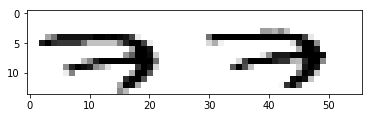

In [3]:
import numpy as np
import pylab
%matplotlib inline
print("训练的图片的表示",mnist.train.images[0], 
     "训练图片的形状",mnist.train.images[0].size)

 
#pylab.title('Label: %d' % np.argmax(mnist.train.labels[4])) 
print(mnist.train.labels[0])
print("标签所对应的值:",np.argmax(mnist.train.labels[0]))
#训练的图片的表达
pylab.imshow(mnist.train.images[0].reshape((14,56)), cmap=pylab.cm.gray_r)  

# 构建模型

In [4]:
#消除以前的图
tf.reset_default_graph()

In [5]:
# 定义输入
images = tf.placeholder(dtype=tf.float32, shape=[None, 28*28])
labels = tf.placeholder(dtype=tf.float32, shape=[None, 10])

In [6]:
# 训练多少批次=训练集的个数//批次的大小
batch_size = 128
n_batch = mnist.train.num_examples // batch_size

#none代表任何值，随批次的大小变化
x = tf.placeholder(tf.float32, [None,784])
y = tf.placeholder(tf.float32, [None, 10])

In [7]:
#模型的创建
# 创建一个简单的神经网络，定义权值和偏置值
#预测值用softmax函数，转化为一个概率值存到预测的变量里面
#with tf.name_scope("bianliang"):
W = tf.Variable(tf.zeros([784,10]),name='w')
b = tf.Variable(tf.zeros([1, 10]),name='b')
prediction = tf.nn.softmax(tf.matmul(x,W) + b)

Instructions for updating:
Colocations handled automatically by placer.


# 训练模型

In [8]:
#训练模型
# 梯度下降法，0.2的学习率，loss初始化变量
#with tf.name_scope("train"):
loss = tf.reduce_mean(tf.square(y-prediction))
train_step = tf.train.GradientDescentOptimizer(0.2).minimize(loss)

##预测的标签是否与真实的标签一致
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(prediction,1)) #argmax 返回一维张量中最大值索引
# 求准确率，cast把布尔型转化为浮点型，再求平均值，比如有9个1就说明9个是正确的。
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32)) # 把布尔值转换为浮点型求平均数

# 迭代计算

In [9]:
#saver=tf.train.Saver()                       #保存模型

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

#writer = tf.summary.FileWriter('logs/',sess.graph)



for batch in range(1):
    # 获得批次数据，图片的数据保存在batch_xs,图片的标签保存在batch_ys
    batch_xs, batch_ys = mnist.train.next_batch(batch_size)
    
    print(batch_xs)
    print(batch_ys)
    
    print(type(batch_xs))
    print(type(batch_ys))
    
    sess.run(train_step, feed_dict={x:batch_xs, y:batch_ys})
    
    #所有的数据训练一个周期后测试一下准确率
    correct_prediction1 = sess.run(correct_prediction, feed_dict={x:mnist.test.images,y:mnist.test.labels})
    acc = sess.run(accuracy, feed_dict={x:mnist.test.images,y:mnist.test.labels})
    print("一致性",correct_prediction1,len(correct_prediction1))
    print("准确率为：",acc)

#saver.save(sess,'net/my_net.ckpt')                  #保存模型

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
一致性 [False False False ... False False False] 10000
准确率为： 0.218


# 进行预测

真实的标签： 5
预测的值为： 2


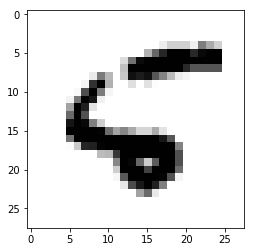

In [17]:
i=8
image=mnist.test.images[i].reshape((1,784))
print("真实的标签：",np.argmax(mnist.test.labels[i]))

prediction = tf.nn.softmax(tf.matmul(image,W))
pre=sess.run(prediction)
#print(type(pre))    #一个强大的n维数组
print("预测的值为：",np.argmax(pre))

pylab.imshow(mnist.test.images[8].reshape((28,28)), cmap=pylab.cm.gray_r) 